<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Пропуски</a></span></li><li><span><a href="#Нечисловой-тип-данных" data-toc-modified-id="Нечисловой-тип-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Нечисловой тип данных</a></span></li><li><span><a href="#Разбивка-данных-на-train/valid/test" data-toc-modified-id="Разбивка-данных-на-train/valid/test-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Разбивка данных на train/valid/test</a></span></li><li><span><a href="#Масштабирование-данных" data-toc-modified-id="Масштабирование-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Масштабирование данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Порог-классификации" data-toc-modified-id="Порог-классификации-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Порог классификации</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Поиск-лучшей-модели" data-toc-modified-id="Поиск-лучшей-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Поиск лучшей модели</a></span><ul class="toc-item"><li><span><a href="#One-Hot-Encoding" data-toc-modified-id="One-Hot-Encoding-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>One Hot Encoding</a></span></li><li><span><a href="#Ordinal-Encoding" data-toc-modified-id="Ordinal-Encoding-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Ordinal Encoding</a></span></li><li><span><a href="#ROC-кривые" data-toc-modified-id="ROC-кривые-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>ROC-кривые</a></span></li><li><span><a href="#Значимость-признака-tenure" data-toc-modified-id="Значимость-признака-tenure-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Значимость признака <code>tenure</code></a></span></li><li><span><a href="#Обучение-на-train-+-valid" data-toc-modified-id="Обучение-на-train-+-valid-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Обучение на train + valid</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Нам доступны исторические данные о поведении клиентов и расторжении договоров с банком. 
Попробуем спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. 

**Описание данных** 

Признаки:
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

Целевой признак:
* Exited — факт ухода клиента

Попробуем построить модель с предельно большим значением *F1*-меры (ориентируемся на значение 0.59). Попробуем разные модели (дерево решений, случайный лес, логистическую регрессию) и разные способы борьбы с дисбалансом классов. Дополнительно будем отслежвать значение *AUC-ROC*.



In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle

from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score

pd.options.mode.chained_assignment=None

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Подготовка данных

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Видим три проблемы:
1. Пропуски в `Tenure`
2. Нечисловой тип данных в некоторых столбцах
3. Разный маштаб у признаков

Перед тем, как разбираться с описанными выше проблемами, удалим ненужные столбцы `RowNumber` и `CustomerId`, проверим нет ли дубликатов.

In [4]:
df = df.drop(columns=['RowNumber', 'CustomerId'])
df.duplicated().sum()

0

Отлично, дубликатов не обнаружено. Также удалим столбец `Surname`, т.к. ожидаем, что фамилия клиента не влияет на вероятность ухода.

In [5]:
df = df.drop(columns=['Surname'])

### Пропуски

In [6]:
display('Доля пропущенных значений в столбце Tenure: ' + 
        str(df['Tenure'].isna().sum() / len(df['Tenure'])))
df['Tenure'].value_counts(dropna=False)

'Доля пропущенных значений в столбце Tenure: 0.0909'

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
NaN     909
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

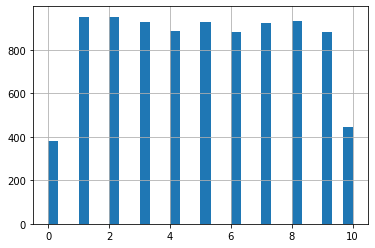

In [7]:
df['Tenure'].hist(bins=30)

In [8]:
for column in df.columns:
    try:
        display(column)
        a = df[column].mean()
        b = df[df['Tenure'].isna()][column].mean()
        display('Среднее значение на всей выборке: ' + str(a))
        display('Среднее значение на пропусках: ' + str(b))
        display('Отклонение (относительное): ' + str((b - a)/a))
    except:
        display(f'We got a problem! Не могу посчить среднее для {column}')

'CreditScore'

'Среднее значение на всей выборке: 650.5288'

'Среднее значение на пропусках: 648.4510451045104'

'Отклонение (относительное): -0.0031939475938492614'

'Geography'

'We got a problem! Не могу посчить среднее для Geography'

'Gender'

'We got a problem! Не могу посчить среднее для Gender'

'Age'

'Среднее значение на всей выборке: 38.9218'

'Среднее значение на пропусках: 38.64796479647965'

'Отклонение (относительное): -0.0070355225996831874'

'Tenure'

'Среднее значение на всей выборке: 4.997690023099769'

'Среднее значение на пропусках: nan'

'Отклонение (относительное): nan'

'Balance'

'Среднее значение на всей выборке: 76485.889288'

'Среднее значение на пропусках: 76117.34147414743'

'Отклонение (относительное): -0.004818507273476934'

'NumOfProducts'

'Среднее значение на всей выборке: 1.5302'

'Среднее значение на пропусках: 1.5302530253025302'

'Отклонение (относительное): 3.465253073464379e-05'

'HasCrCard'

'Среднее значение на всей выборке: 0.7055'

'Среднее значение на пропусках: 0.7106710671067107'

'Отклонение (относительное): 0.007329648627513351'

'IsActiveMember'

'Среднее значение на всей выборке: 0.5151'

'Среднее значение на пропусках: 0.5104510451045104'

'Отклонение (относительное): -0.00902534439038935'

'EstimatedSalary'

'Среднее значение на всей выборке: 100090.239881'

'Среднее значение на пропусках: 99180.3893729373'

'Отклонение (относительное): -0.0090903020029171'

'Exited'

'Среднее значение на всей выборке: 0.2037'

'Среднее значение на пропусках: 0.20132013201320131'

'Отклонение (относительное): -0.01168320072066116'

Видим, что значения потеряны равномерно, отклонения средних значений всех признаков по полной выборке и выборке с пропусками в `Tenure` не превышают 1-2%. Удалим объекты с пропусками. 

Копию датафрейма с сохраненным столбцом `Tenure` сохраним в датафрейме **df_raw**: после построения модели проверим значимость признака `Tenure`, если она окажется низкой, то можно будет отказаться от этого признака, сохранив 10% данных.

In [9]:
df_raw = df.copy()
df = df.dropna(subset=['Tenure'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 11 columns):
CreditScore        9091 non-null int64
Geography          9091 non-null object
Gender             9091 non-null object
Age                9091 non-null int64
Tenure             9091 non-null float64
Balance            9091 non-null float64
NumOfProducts      9091 non-null int64
HasCrCard          9091 non-null int64
IsActiveMember     9091 non-null int64
EstimatedSalary    9091 non-null float64
Exited             9091 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 852.3+ KB


### Нечисловой тип данных

Будем использовать OHE кодирование, так как планируем работать и с логистической регрессией, и с деревом решений, и со случайным лесом.

In [10]:
df = pd.get_dummies(df, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 12 columns):
CreditScore          9091 non-null int64
Age                  9091 non-null int64
Tenure               9091 non-null float64
Balance              9091 non-null float64
NumOfProducts        9091 non-null int64
HasCrCard            9091 non-null int64
IsActiveMember       9091 non-null int64
EstimatedSalary      9091 non-null float64
Exited               9091 non-null int64
Geography_Germany    9091 non-null uint8
Geography_Spain      9091 non-null uint8
Gender_Male          9091 non-null uint8
dtypes: float64(3), int64(6), uint8(3)
memory usage: 736.9 KB


### Разбивка данных на train/valid/test

In [11]:
# подготовим данные
# train/valid/test = 60/20/20

df_train, df_valid_test = train_test_split(df, test_size=0.4, random_state=42, stratify=df['Exited'])
df_valid, df_test = train_test_split(df_valid_test, test_size=0.5, random_state=42, stratify=df_valid_test['Exited'])

features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']
features_valid = df_valid.drop(['Exited'], axis=1)
target_valid = df_valid['Exited']
features_test = df_test.drop(['Exited'], axis=1)
target_test = df_test['Exited']

assert len(features_train) == len(target_train)
assert len(features_valid) == len(target_valid)
assert len(features_test) == len(target_test)

display('Размер обучающей/валидационной/тестовой выборок')
display(str(len(features_train)) + '/' + str(len(features_valid)) + '/' + str(len(features_test)))


models_comparision_df = pd.DataFrame(columns=['tree_f1', 'tree_roc_auc', 'forest_f1', 'forest_roc_auc',
                                  'regr_f1', 'regr_roc_auc']) # здесь будем хранить метрики разных моделей

'Размер обучающей/валидационной/тестовой выборок'

'5454/1818/1819'

### Масштабирование данных

Посмотрим распределения количественных величин.

In [12]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

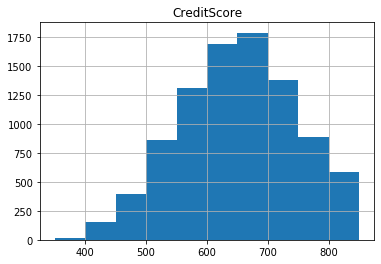

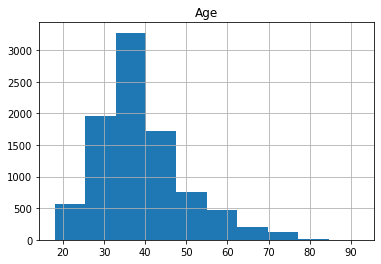

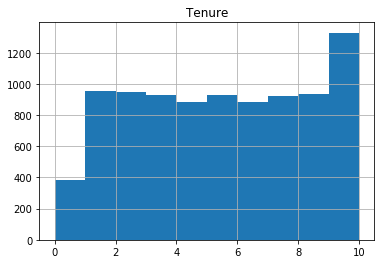

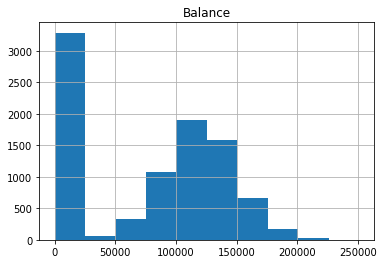

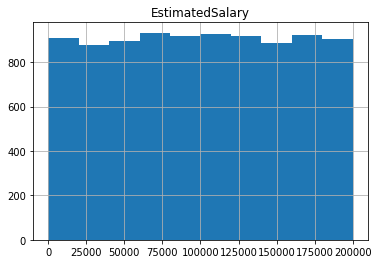

In [13]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
not_numeric = ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Geography_Germany', 
               'Geography_Spain', 'Gender_Male']
for column in numeric:
    df[column].hist()
    plt.title(column)
    plt.show()

In [14]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train_with_scaling = features_train.copy()
features_train_with_scaling[numeric] = scaler.transform(features_train[numeric])

features_valid_with_scaling = features_valid.copy()
features_valid_with_scaling[numeric] = scaler.transform(features_valid[numeric])

features_test_with_scaling = features_test.copy()
features_test_with_scaling[numeric] = scaler.transform(features_test[numeric])

### Вывод

Работаем с датафреймов из 10000 объектов и 14 признаков (один целевой).
1. Удалили признаки, которые, как мы ожидаем не влияют на вероятность ухода клиента: `RowNumber`, `CustomerId` и `Surname`.
2. Удалили объекты с пропусками в `Tenure`, проверив, что они распределены равномерно по выборке. При этом сохранили удаленные данныена случай, если его значимость окажется низкой: в этом случае, возможно, окажется выгодней удалить признак и сохранить 10% данных.
3. Нечисловые признаки преобразовали с помощью OHE-кодирования.
4. Разбили датасет на train/valid/test в отношении 60/20/20.
5. Масштабировали количественные признаки.

## Исследование задачи

In [15]:
df['Exited'].value_counts(normalize=True)

0    0.796062
1    0.203938
Name: Exited, dtype: float64

Видим, что работаем с дисбалансом классов: на положительный класс приходится около 20% выборки, на отрицательный - около 80%. Посмотрим, что сможем получить из стандартных моделей, игнорируя проблему дисбаланса.

In [16]:
def check_models(features_train=features_train_with_scaling, 
                 features_valid=features_valid_with_scaling, target_train=target_train, 
                 target_valid=target_valid, class_weight=None, label=''):
    """
    input: 
    features_train=features_train_with_scaling, features_valid=features_valid_with_scaling,
    target_train=target_train, target_valid=target_valid - DataFrames
    class_weight=None - class_weight value for DecisionTreeClassifier, RandomForestClassifier, LogisticRegression
    label - str - index name for output df 
    
    output: df (1 string, 6 columns) with float numbers - f1_score and roc-auc-score for default 
    DecisionTreeClassifier, RandomForestClassifier, LogisticRegression calculated on valid frame
    """
    
    output_to_df = []
    for ml_model in [DecisionTreeClassifier, RandomForestClassifier, LogisticRegression]:
        model = ml_model(random_state=42, class_weight=class_weight)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        
        output_to_df.append(f1_score(target_valid, predicted_valid))
        output_to_df.append(roc_auc_score(target_valid, probabilities_one_valid))
    
    output_df = pd.DataFrame(output_to_df).transpose()
    output_df.columns = ['tree_f1', 'tree_roc_auc', 'forest_f1', 'forest_roc_auc',
                                  'regr_f1', 'regr_roc_auc']
    output_df.index =[label]
    return output_df

In [17]:
models_comparision_df = pd.concat(
    [models_comparision_df, 
     check_models(features_train=features_train, features_valid=features_valid, 
                  label='no_balance&no_scaling')]
)

models_comparision_df = pd.concat(
    [models_comparision_df, 
     check_models(features_train=features_train_with_scaling, 
                  features_valid=features_valid_with_scaling,
                  label='no_balance&scaling')]
)

models_comparision_df

,tree_f1,tree_roc_auc,forest_f1,forest_roc_auc,regr_f1,regr_roc_auc
no_balance&no_scaling,0.495186,0.681772,0.481884,0.815306,0.102804,0.683504
no_balance&scaling,0.495890,0.682429,0.487365,0.815230,0.272727,0.752314


**Вывод**

Видим, что:
1. Ни одна из моделей без настройки гиперпараметров не дотягивает до целевого значения f1-score = 0.59. 
2. Использование масштабированных данных заметно повышает f1-score и ROC-AUC-score для логистической регрессии и почти не влияет на результаты дерева решений и случайного леса. В дальнейшем исследовании будем использовать масштабированные признаки.

## Борьба с дисбалансом

### Взвешивание классов

In [18]:
models_comparision_df = pd.concat(
    [models_comparision_df, 
     check_models(features_train_with_scaling, features_valid_with_scaling, 
                  class_weight='balanced', label='class_weight')]
)

models_comparision_df

,tree_f1,tree_roc_auc,forest_f1,forest_roc_auc,regr_f1,regr_roc_auc
no_balance&no_scaling,0.495186,0.681772,0.481884,0.815306,0.102804,0.683504
no_balance&scaling,0.495890,0.682429,0.487365,0.815230,0.272727,0.752314
class_weight,0.500000,0.685435,0.486188,0.828970,0.481159,0.756589


Видим, что метрики заметно улучшились у логистической регрессии.

### Upsampling

In [19]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [20]:
repeat = round(df['Exited'].value_counts()[0]//df['Exited'].value_counts()[1])
features_upsampled, target_upsampled = upsample(features_train_with_scaling, target_train, 
                                                repeat)

models_comparision_df = pd.concat(
    [models_comparision_df, 
     check_models(features_train=features_upsampled, target_train=target_upsampled, 
                  label='upsampling')]
)

models_comparision_df

,tree_f1,tree_roc_auc,forest_f1,forest_roc_auc,regr_f1,regr_roc_auc
no_balance&no_scaling,0.495186,0.681772,0.481884,0.815306,0.102804,0.683504
no_balance&scaling,0.495890,0.682429,0.487365,0.815230,0.272727,0.752314
class_weight,0.500000,0.685435,0.486188,0.828970,0.481159,0.756589
upsampling,0.487145,0.677626,0.565079,0.830021,0.478261,0.755896


Видим, что относительно несбалансированной выборки f1-score заметно улучшился у случайного леса и логистической регресии.

### Downsampling

In [21]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [22]:
fraction = (df['Exited'].value_counts()[1] / df['Exited'].value_counts()[0])
features_downsampled, target_downsampled = downsample(features_train_with_scaling, 
                                                      target_train, fraction)

models_comparision_df = pd.concat(
    [models_comparision_df, 
     check_models(features_train=features_downsampled, target_train=target_downsampled,
                  label='downsampling')]
)

models_comparision_df

,tree_f1,tree_roc_auc,forest_f1,forest_roc_auc,regr_f1,regr_roc_auc
no_balance&no_scaling,0.495186,0.681772,0.481884,0.815306,0.102804,0.683504
no_balance&scaling,0.495890,0.682429,0.487365,0.815230,0.272727,0.752314
class_weight,0.500000,0.685435,0.486188,0.828970,0.481159,0.756589
upsampling,0.487145,0.677626,0.565079,0.830021,0.478261,0.755896
downsampling,0.491589,0.703791,0.552632,0.817672,0.477756,0.753858


Видим, что относительно несбалансированной выборки f1-score заметно улучшился у случайного леса и логистической регресии. Немного вырос ROC-AUC-score у дерева решений.

### Порог классификации

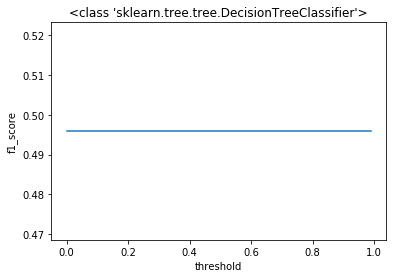

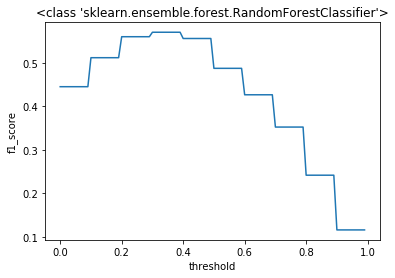

C:\Users\Alex\anaconda3\envs\praktikum\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


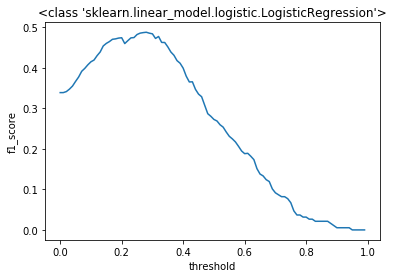

,tree_f1,tree_roc_auc,forest_f1,forest_roc_auc,regr_f1,regr_roc_auc
no_balance&no_scaling,0.495186,0.681772,0.481884,0.815306,0.102804,0.683504
no_balance&scaling,0.495890,0.682429,0.487365,0.815230,0.272727,0.752314
class_weight,0.500000,0.685435,0.486188,0.828970,0.481159,0.756589
upsampling,0.487145,0.677626,0.565079,0.830021,0.478261,0.755896
downsampling,0.491589,0.703791,0.552632,0.817672,0.477756,0.753858
threshold,0.495890,0.682429,0.570270,0.815230,0.487990,0.752314


In [23]:
output_to_df = []

for ml_model in [DecisionTreeClassifier, RandomForestClassifier, LogisticRegression]:
    x, y = [], []
    
    model = ml_model(random_state=42)
    model.fit(features_train_with_scaling, target_train)
    probabilities_valid = model.predict_proba(features_valid_with_scaling)
    probabilities_one_valid = probabilities_valid[:, 1]
    
    best_threshold = 0
    best_f1_score = 0
    best_roc_auc = 0
    for threshold in np.arange(0, 1, 0.01):
        predicted_valid = probabilities_one_valid > threshold 
        f1 = f1_score(target_valid, predicted_valid)
        if f1 > best_f1_score:
            best_f1_score = f1
            best_threshold = threshold
            best_roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
        
        y.append(f1)
        x.append(threshold)
    
    output_to_df.append(best_f1_score)
    output_to_df.append(best_roc_auc)
    
    plt.plot(pd.Series(x),pd.Series(y))
    plt.xlabel('threshold')
    plt.ylabel('f1_score')
    plt.title(ml_model)
    plt.show()
    

output_df = pd.DataFrame(output_to_df).transpose()
output_df.columns = ['tree_f1', 'tree_roc_auc', 'forest_f1', 'forest_roc_auc',
                                  'regr_f1', 'regr_roc_auc']
output_df.index =['threshold']
    

models_comparision_df = pd.concat([models_comparision_df, output_df])

models_comparision_df

Видим, что относительно несбалансированной выборки f1-score заметно улучшился у случайного леса и логистической регресии. 

### Выводы

1. Для дерева решений учет дисбаланса практически не влияет на f1-score и ROC-AUC-score.
2. Для случайного леса учет дисбаланса (кроме взвешивания классов) увеличивает метрики: при этом взвешивание классов не оказало никакого влияния, а вот upsampling, downsampling и варьирование порога классификации повысило f1-score c 0.49 до 0.55-0.57. Лучший результат по f1-score показал подбор порога. ROC-AUC-score практически без изменений: 0.81-0.83.
3. Для логистической регрессии учет дисбаланса сильно увеличил метрики: с 0.27 до 0.47-0.49. Лучший результат также показал подбор порога. ROC-AUC-score увеличилось с 0.68 без масштабирования до 0.75-0.76 с маштабирование (учет дисбаланса практически не повлиял).

Так как ни одна из моделей не добралась до f1-score в 0.59, попробуем подобрать гиперпараметры для фаворита - случайного леса, чтобы преодолеть предложенный нам порог.

## Поиск лучшей модели

Работать будем со случайным лесом, лучший результат показал подбор порога классификации.

### One Hot Encoding

In [24]:
%%time

best_model_forest_ohe = None
best_est_ohe = 0
best_crit_ohe = ''

best_threshold_ohe = 0
best_f1_score_ohe = 0
best_roc_auc_ohe = 0

for est in tqdm(range(1, 31)):
    for crit in ['gini', 'entropy']:
        model = RandomForestClassifier(random_state=42, n_estimators=est, criterion=crit)
        model.fit(features_train_with_scaling, target_train)
        probabilities_valid = model.predict_proba(features_valid_with_scaling)
        probabilities_one_valid = probabilities_valid[:, 1]
        
        for threshold in np.arange(0, 1, 0.01):
            predicted_valid = probabilities_one_valid > threshold 
            f1 = f1_score(target_valid, predicted_valid)
            if f1 > best_f1_score_ohe:
                best_f1_score_ohe = f1
                best_threshold_ohe = threshold
                best_roc_auc_ohe = roc_auc_score(target_valid, probabilities_one_valid)
                
                best_model_forest_ohe = model
                best_est_ohe = est
                best_crit_ohe = crit
            
display("F1-score наилучшей модели на валидационной выборке: " + str(best_f1_score_ohe))
display("ROC-AUC-score: " + str(best_roc_auc_ohe))
display('Порог классификации: ' + str(best_threshold_ohe))
display("Количество деревьев в лесу (est): " + str(best_est_ohe))
display('Критерий: ' + best_crit_ohe)

  0%|          | 0/30 [00:00<?, ?it/s]

'F1-score наилучшей модели на валидационной выборке: 0.6135458167330677'

'ROC-AUC-score: 0.8403826487369537'

'Порог классификации: 0.3'

'Количество деревьев в лесу (est): 24'

'Критерий: entropy'

Wall time: 1min 13s


Мы смогли получить f1-score > 0.59. 

Теперь посмотрим, что можно получить, если вместо OHE использовать OrdinalEncoding.

### Ordinal Encoding

In [25]:
df_ord = df_raw.copy()
df_ord = df_ord.dropna(subset=['Tenure'])
encoder = OrdinalEncoder()
df_ordinal = pd.DataFrame(encoder.fit_transform(df_ord), columns=df_ord.columns)
df_ordinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 11 columns):
CreditScore        9091 non-null float64
Geography          9091 non-null float64
Gender             9091 non-null float64
Age                9091 non-null float64
Tenure             9091 non-null float64
Balance            9091 non-null float64
NumOfProducts      9091 non-null float64
HasCrCard          9091 non-null float64
IsActiveMember     9091 non-null float64
EstimatedSalary    9091 non-null float64
Exited             9091 non-null float64
dtypes: float64(11)
memory usage: 781.4 KB


In [26]:
# подготовим данные
# train/valid/test = 60/20/20

df_train_ord, df_valid_test_ord = train_test_split(df_ordinal, test_size=0.4, random_state=42, stratify=df_ordinal['Exited'])
df_valid_ord, df_test_ord = train_test_split(df_valid_test_ord, test_size=0.5, random_state=42, stratify=df_valid_test_ord['Exited'])

features_train_ord = df_train_ord.drop(['Exited'], axis=1)
target_train_ord = df_train_ord['Exited']
features_valid_ord = df_valid_ord.drop(['Exited'], axis=1)
target_valid_ord = df_valid_ord['Exited']
features_test_ord = df_test_ord.drop(['Exited'], axis=1)
target_test_ord = df_test_ord['Exited']

assert len(features_train_ord) == len(target_train_ord)
assert len(features_valid_ord) == len(target_valid_ord)
assert len(features_test_ord) == len(target_test_ord)

display('Размер обучающей/валидационной/тестовой выборок')
display(str(len(features_train_ord)) + '/' + str(len(features_valid_ord)) + '/' + str(len(features_test_ord)))


'Размер обучающей/валидационной/тестовой выборок'

'5454/1818/1819'

In [27]:
features_train_ord.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [28]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
not_numeric = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

scaler = StandardScaler()
scaler.fit(features_train_ord[numeric])

features_train_with_scaling_ord = features_train_ord.copy()
features_train_with_scaling_ord[numeric] = scaler.transform(features_train_ord[numeric])

features_valid_with_scaling_ord = features_valid_ord.copy()
features_valid_with_scaling_ord[numeric] = scaler.transform(features_valid_ord[numeric])

features_test_with_scaling_ord = features_test_ord.copy()
features_test_with_scaling_ord[numeric] = scaler.transform(features_test_ord[numeric])

In [29]:
%%time

best_model_forest_ord = None
best_est_ord = 0
best_crit_ord = ''

best_threshold_ord = 0
best_f1_score_ord = 0
best_roc_auc_ord = 0

for est in tqdm(range(1, 51)):
    for crit in ['gini', 'entropy']:
        model = RandomForestClassifier(random_state=42, n_estimators=est, criterion=crit)
        model.fit(features_train_with_scaling_ord, target_train_ord)
        probabilities_valid = model.predict_proba(features_valid_with_scaling_ord)
        probabilities_one_valid = probabilities_valid[:, 1]
        
        for threshold in np.arange(0, 1, 0.01):
            predicted_valid_ord = probabilities_one_valid > threshold 
            f1 = f1_score(target_valid_ord, predicted_valid_ord)
            if f1 > best_f1_score_ord:
                best_f1_score_ord = f1
                best_threshold_ord = threshold
                best_roc_auc_ord = roc_auc_score(target_valid_ord, probabilities_one_valid)
                
                best_model_forest_ord = model
                best_est_ord = est
                best_crit_ord = crit
            
display("F1-score наилучшей модели на валидационной выборке: " + str(best_f1_score_ord))
display("ROC-AUC-score: " + str(best_roc_auc_ord))
display('Порог классификации: ' + str(best_threshold_ord))
display("Количество деревьев в лесу (est): " + str(best_est_ord))
display('Критерий: ' + best_crit_ord)

  0%|          | 0/50 [00:00<?, ?it/s]

'F1-score наилучшей модели на валидационной выборке: 0.6078697421981003'

'ROC-AUC-score: 0.8421764893254378'

'Порог классификации: 0.32'

'Количество деревьев в лесу (est): 38'

'Критерий: entropy'

Wall time: 2min 48s


Результат не сильно отличается от OHE: f1-score 0.608 против 0.614, ROC-AUC-score тоже отличается незначимо. Мы ожидали некоторого прироста для модели, обученной на данных с OrdinalEncoding. Это может быть связано либо с тем, что "штраф" модели за использование OHE невелик, т.к. количество категориальных признаков мало и/или они незначимы, либо с тем, что используется не оптимальный для модели способ борьбы с дисбалансом классов.

### ROC-кривые

Посмотрим на ROC-кривые для этих моделей и сравним с лучшими представителями других моделей: дерево решений со взвешиванием классов и логистическая регрессия с использованием upsampling.

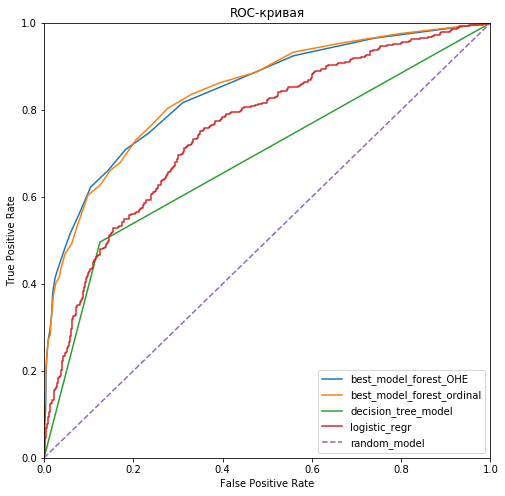

In [30]:
# best random forest model OHE
probabilities_valid = best_model_forest_ohe.predict_proba(features_valid_with_scaling)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_forest_ohe, tpr_forest_ohe, thresholds_forest = roc_curve(target_valid, probabilities_one_valid)

# best random forest model OrdinalEncoding
probabilities_valid = best_model_forest_ord.predict_proba(features_valid_with_scaling_ord)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_forest_ord, tpr_forest_ord, thresholds_forest = roc_curve(target_valid_ord, probabilities_one_valid)

# best decision tree model with class_weight='balanced'
model_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
model_tree.fit(features_train_with_scaling, target_train)
probabilities_valid = model_tree.predict_proba(features_valid_with_scaling)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_tree, tpr_tree, thresholds_tree = roc_curve(target_valid, probabilities_one_valid)

# best logistic regression model with upsampling
model_logistic_regr = LogisticRegression(random_state=42)
model_logistic_regr.fit(features_upsampled, target_upsampled)
probabilities_valid = model_logistic_regr.predict_proba(features_valid_with_scaling)
probabilities_one_valid = probabilities_valid[:, 1]
fpr_regr, tpr_regr, thresholds_regr = roc_curve(target_valid, probabilities_one_valid)


plt.figure(figsize=(8,8))
plt.plot(fpr_forest_ohe, tpr_forest_ohe)
plt.plot(fpr_forest_ord, tpr_forest_ord)
plt.plot(fpr_tree, tpr_tree)
plt.plot(fpr_regr, tpr_regr)
plt.plot([0, 1], [0, 1], linestyle='--') # ROC-кривая случайной модели

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.legend(['best_model_forest_OHE', 'best_model_forest_ordinal', 'decision_tree_model', 'logistic_regr', 'random_model'])
plt.show()

Видим, что и ROC-кривые практически совпадают.

Основной моделью оставляем случайный лес, обученный на данных с OHE.

### Значимость признака `tenure`

In [31]:
feature_names = features_valid_with_scaling.columns
feature_importance = best_model_forest_ohe.feature_importances_

pd.Series(feature_importance, index=feature_names).sort_values(ascending=False)

Age                  0.238680
Balance              0.149358
EstimatedSalary      0.147534
CreditScore          0.142188
NumOfProducts        0.116287
Tenure               0.082887
IsActiveMember       0.036948
Geography_Germany    0.026464
Gender_Male          0.025359
HasCrCard            0.020044
Geography_Spain      0.014252
dtype: float64

Значимость `tenure` - около 8%. Напонятно, стоит ли отказ от этого признака увеличения обучающей выборки на 10%. Сделаем еще одну модель и посмотрим на её score.

In [32]:
df_raw = df_raw.drop(columns=['Tenure'])

In [33]:
df_raw = pd.get_dummies(df_raw, drop_first=True)

In [34]:
df_train_raw, df_valid_test_raw = train_test_split(df_raw, test_size=0.4, random_state=42, stratify=df_raw['Exited'])
df_valid_raw, df_test_raw = train_test_split(df_valid_test_raw, test_size=0.5, random_state=42, stratify=df_valid_test_raw['Exited'])

features_train_raw = df_train_raw.drop(['Exited'], axis=1)
target_train_raw = df_train_raw['Exited']
features_valid_raw = df_valid_raw.drop(['Exited'], axis=1)
target_valid_raw = df_valid_raw['Exited']
features_test_raw = df_test_raw.drop(['Exited'], axis=1)
target_test_raw = df_test_raw['Exited']

assert len(features_train_raw) == len(target_train_raw)
assert len(features_valid_raw) == len(target_valid_raw)
assert len(features_test_raw) == len(target_test_raw)

display('Размер обучающей/валидационной/тестовой выборок')
display(str(len(features_train_raw)) + '/' + str(len(features_valid_raw)) + '/' + str(len(features_test_raw)))

'Размер обучающей/валидационной/тестовой выборок'

'6000/2000/2000'

In [35]:
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train_raw[numeric])

features_train_with_scaling_raw = features_train_raw.copy()
features_train_with_scaling_raw[numeric] = scaler.transform(features_train_raw[numeric])

features_valid_with_scaling_raw = features_valid_raw.copy()
features_valid_with_scaling_raw[numeric] = scaler.transform(features_valid_raw[numeric])

features_test_with_scaling_raw = features_test_raw.copy()
features_test_with_scaling_raw[numeric] = scaler.transform(features_test_raw[numeric])

In [36]:
%%time

best_model_forest_raw = None
best_est_raw = 0
best_crit_raw = ''

best_threshold_raw = 0
best_f1_score_raw = 0
best_roc_auc_raw = 0

for est in tqdm(range(1, 31)):
    for crit in ['gini', 'entropy']:
        model = RandomForestClassifier(random_state=42, n_estimators=est, criterion=crit)
        model.fit(features_train_with_scaling_raw, target_train_raw)
        probabilities_valid = model.predict_proba(features_valid_with_scaling_raw)
        probabilities_one_valid = probabilities_valid[:, 1]
        
        for threshold in np.arange(0, 1, 0.01):
            predicted_valid = probabilities_one_valid > threshold 
            f1 = f1_score(target_valid_raw, predicted_valid)
            if f1 > best_f1_score_raw:
                best_f1_score_raw = f1
                best_threshold_raw = threshold
                best_roc_auc_raw = roc_auc_score(target_valid_raw, probabilities_one_valid)
                
                best_model_forest_raw = model
                best_est_raw = est
                best_crit_raw = crit
            
display("F1-score наилучшей модели на валидационной выборке: " + str(best_f1_score_raw))
display("ROC-AUC-score: " + str(best_roc_auc_raw))
display('Порог классификации: ' + str(best_threshold_raw))
display("Количество деревьев в лесу (est): " + str(best_est_raw))
display('Критерий: ' + best_crit_raw)

  0%|          | 0/30 [00:00<?, ?it/s]

'F1-score наилучшей модели на валидационной выборке: 0.6243781094527363'

'ROC-AUC-score: 0.8481754667947582'

'Порог классификации: 0.39'

'Количество деревьев в лесу (est): 26'

'Критерий: gini'

Wall time: 1min 21s


Видим, небольшое улучшение f1-score и ROC-AUC-score. Берем эту модель в качестве лучшей.

### Обучение на train + valid

Перед финальным тестированием обучим модель на объединении train и valid выборок, используя подобранные ранее оптимальные параметры модели.

In [37]:
features_train_valid_raw = pd.concat([features_train_raw, features_valid_raw])
target_train_valid_raw = pd.concat([target_train_raw, target_valid_raw])
assert len(features_train_valid_raw) == len(target_train_valid_raw)

In [38]:
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train_valid_raw[numeric])

features_train_valid_with_scaling_raw = features_train_valid_raw.copy()
features_train_valid_with_scaling_raw[numeric] = scaler.transform(features_train_valid_raw[numeric])

features_test_with_scaling_raw = features_test_raw.copy()
features_test_with_scaling_raw[numeric] = scaler.transform(features_test_raw[numeric])

In [39]:
final_model = RandomForestClassifier(random_state=42, n_estimators=best_est_raw, 
                                    criterion=best_crit_raw)

final_model.fit(features_train_valid_with_scaling_raw, target_train_valid_raw)
probabilities_train_valid = final_model.predict_proba(features_train_valid_with_scaling_raw)
probabilities_one_train_valid = probabilities_train_valid[:, 1]
predicted_train_valid = probabilities_one_train_valid > best_threshold_raw 

f1 = f1_score(target_train_valid_raw, predicted_train_valid)
roc_auc = roc_auc_score(target_train_valid_raw, probabilities_one_train_valid)
display("F1-score наилучшей модели на train+valid выборке: " + str(f1))
display("ROC-AUC-score: " + str(roc_auc))

'F1-score наилучшей модели на train+valid выборке: 0.9948028125955365'

'ROC-AUC-score: 0.9999725033949399'

Выглядит как переобучение. Вряд ли стоит ждать такого же результата на тестовой выборке.

## Тестирование модели

Посмотрим, какие результаты покажет наша лучшая модель **final_model** на тестовой выборке.

In [40]:
features_test_with_scaling_raw, target_test_raw

probabilities_test = final_model.predict_proba(features_test_with_scaling_raw)
probabilities_one_test = probabilities_test[:, 1]
predicted_test = probabilities_one_test > best_threshold_raw 
f1 = f1_score(target_test_raw, predicted_test)
roc_auc = roc_auc_score(target_test_raw, probabilities_one_test)

display("F1-score наилучшей модели на тестовой выборке: " + str(f1))
display("ROC-AUC-score: " + str(roc_auc))

'F1-score наилучшей модели на тестовой выборке: 0.5860709592641262'

'ROC-AUC-score: 0.8367234723166928'

Хм. Посмотрим какой результат даст аналогичная модель **best_model_forest_raw**, обученная только на train выборке

In [41]:
features_test_with_scaling_raw, target_test_raw

probabilities_test = best_model_forest_raw.predict_proba(features_test_with_scaling_raw)
probabilities_one_test = probabilities_test[:, 1]
predicted_test = probabilities_one_test > best_threshold_raw 
f1 = f1_score(target_test_raw, predicted_test)
roc_auc = roc_auc_score(target_test_raw, probabilities_one_test)

display("F1-score наилучшей модели на тестовой выборке: " + str(f1))
display("ROC-AUC-score: " + str(roc_auc))

'F1-score наилучшей модели на тестовой выборке: 0.5873015873015872'

'ROC-AUC-score: 0.8359445732327088'

Еще раз хм. Посмотрим на лучшую модель с OHE, обученную на выборке, в которой оставлен признак `Tenure` и выброшены объекты с пропусками в этом признаке - **best_model_forest_ohe**.

In [42]:
features_test_with_scaling_raw, target_test_raw

probabilities_test = best_model_forest_ohe.predict_proba(features_test_with_scaling)
probabilities_one_test = probabilities_test[:, 1]
predicted_test = probabilities_one_test > best_threshold_ohe
f1 = f1_score(target_test, predicted_test)
roc_auc = roc_auc_score(target_test, probabilities_one_test)

display("F1-score наилучшей модели на тестовой выборке: " + str(f1))
display("ROC-AUC-score: " + str(roc_auc))

'F1-score наилучшей модели на тестовой выборке: 0.5939086294416244'

'ROC-AUC-score: 0.8293584607824158'

Пороговое значение f1-score > 0.59 преодолено.

# Вывод

У нас получилось построить модель с f1-score = 0.594 на тестовой выборке (ROC-AUC = 0.83). Лучший результат показала модель случайного леса с OHE, использованием масштабирования данных и подбора порога классификации для борьбы с дисбалансом классов.